# Introduction
This Dataset containing information related to loan applications. The training data contained 13 variables and 614 data points. ​These variables include basic information that are usually requested by the bank when applying for a loan. However, the data doesn't have a valid discription, and a clear range of values. It would be hard to make good prediction model for real-life applications. Therefore, this model will be for inference only, meaning I will be just investigating if there is a significant relationship between all the predictors and the Loan Amount.

[Link to the dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv)

In [29]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

# Data Processing and Cleaning

In [32]:
train = pd.read_csv('/content/gdrive/MyDrive/LoanPredict /train.csv')
#train = train.iloc[: , 1:]
#train.dropna()
train.head()

#train.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
train = train.drop(['Loan_ID'], axis = 1)

In [34]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [36]:
train = train.dropna()

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


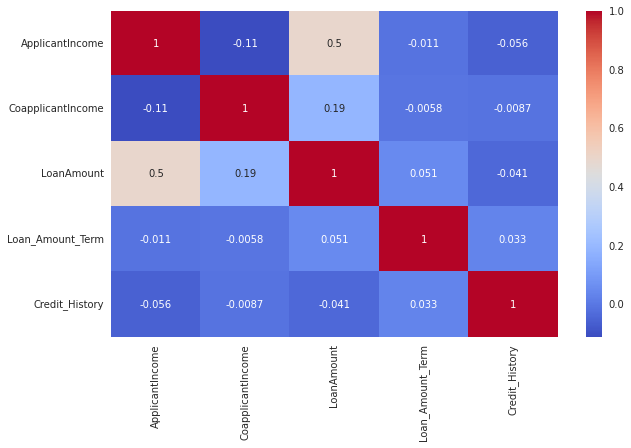

In [38]:
#correlation matrix 
sns.set_style("dark")
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm")

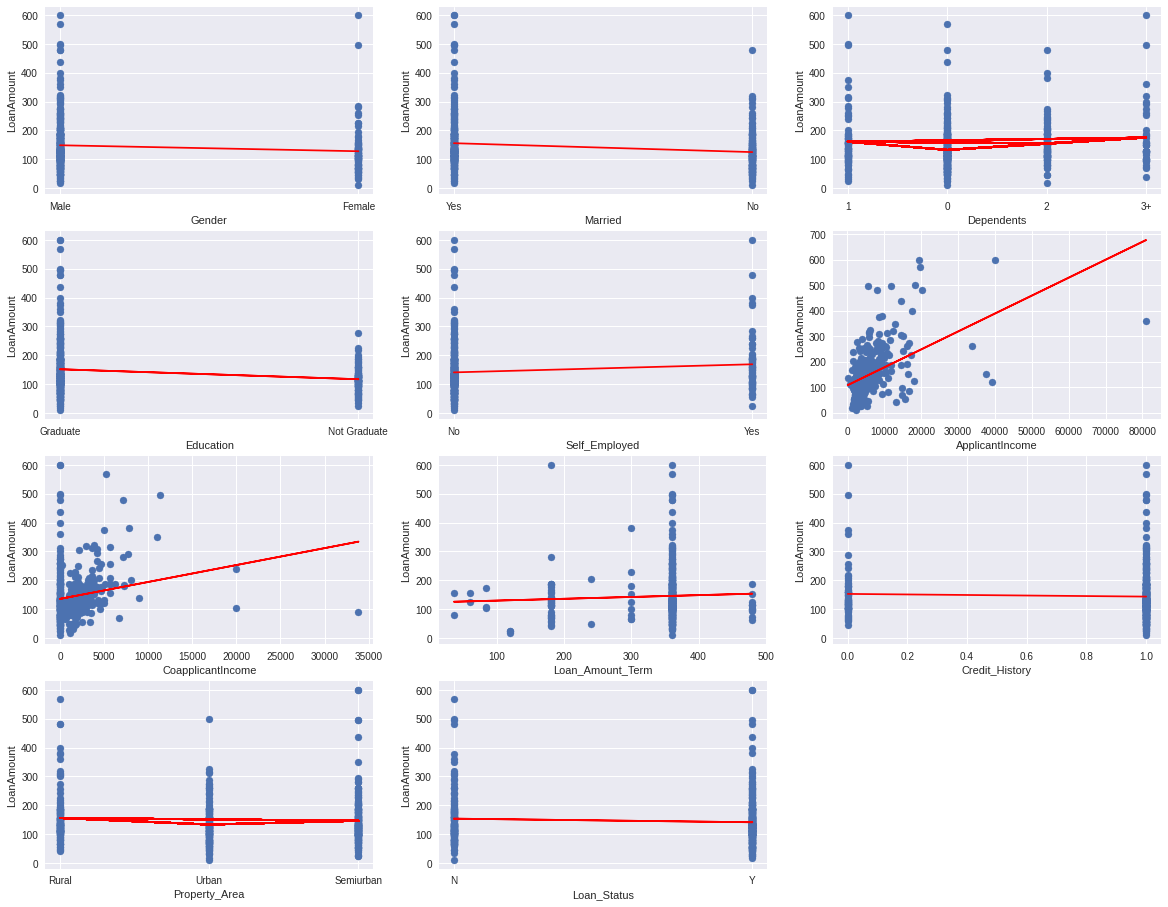

In [39]:
plt.figure(figsize=(20, 20))
plt.style.use('seaborn')
predictors = [c for c in list(train) if c not in ["LoanAmount"]]
for i, predictor in enumerate(predictors):
    model = 'LoanAmount ~ ' + predictor
    res = smf.ols(formula = model, data=train).fit()
    plt.subplot(5,3,i+1)
    plt.xlabel(predictor)
    plt.ylabel("LoanAmount")
    plt.scatter(train[predictor], train['LoanAmount'])
    plt.plot(train[predictor], res.fittedvalues, color='red')

# Creating the model
I created a simple linear model that includes all the columns except Loan Amount as predictors, and Loan Amount as response.

In [40]:
mod = smf.ols(formula='LoanAmount ~ ApplicantIncome + CoapplicantIncome + Dependents + Married + Gender + Married + Education + Self_Employed + Credit_History + Property_Area + Loan_Amount_Term + Loan_Status',data=train)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     18.47
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.15e-36
Time:                        05:48:08   Log-Likelihood:                -2680.9
No. Observations:                 480   AIC:                             5392.
Df Residuals:                     465   BIC:                             5454.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

It looks like only Married, Education, Applicant Income, and Coapplicant Income are significant in predicting the loan amount at $α = 0.05$

In [41]:
mod2 = smf.ols(formula='LoanAmount ~ ApplicantIncome + CoapplicantIncome + Married + Education',data=train)
res2 = mod2.fit() 
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     59.61
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.82e-41
Time:                        05:48:08   Log-Likelihood:                -2689.4
No. Observations:                 480   AIC:                             5389.
Df Residuals:                     475   BIC:                             5410.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [42]:
# model values
model_fitted_y = res2.fittedvalues
# model residuals
model_residuals = res2.resid
# normalized residuals
model_norm_residuals = res2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals 
model_leverage = res.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = res.get_influence().cooks_distance[0]


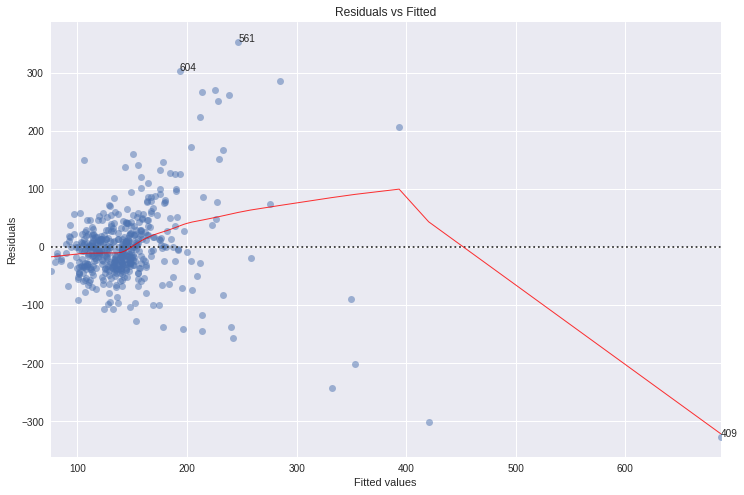

In [43]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=train,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

When checking our model for homoscedasticity, I found that our model contained some heteroscedasticity.​ Due to the cone shape of our residuals plot, I decided to perform a log transformation to our model.​

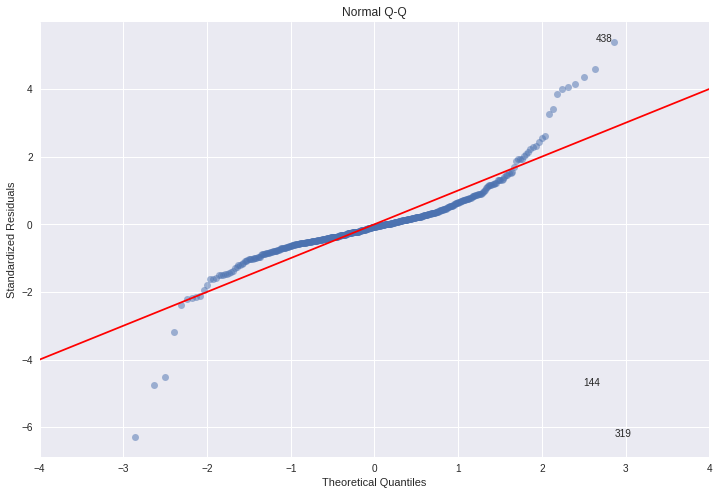

In [44]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
plot_lm_2.axes[0].set_xlim(-4,4)

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

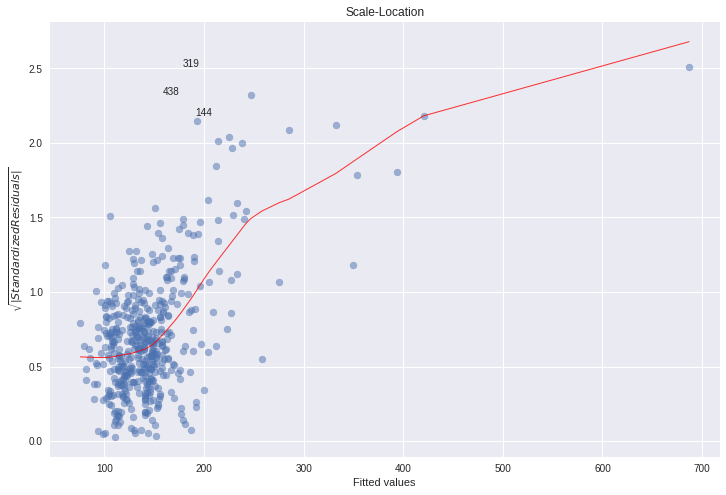

In [45]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

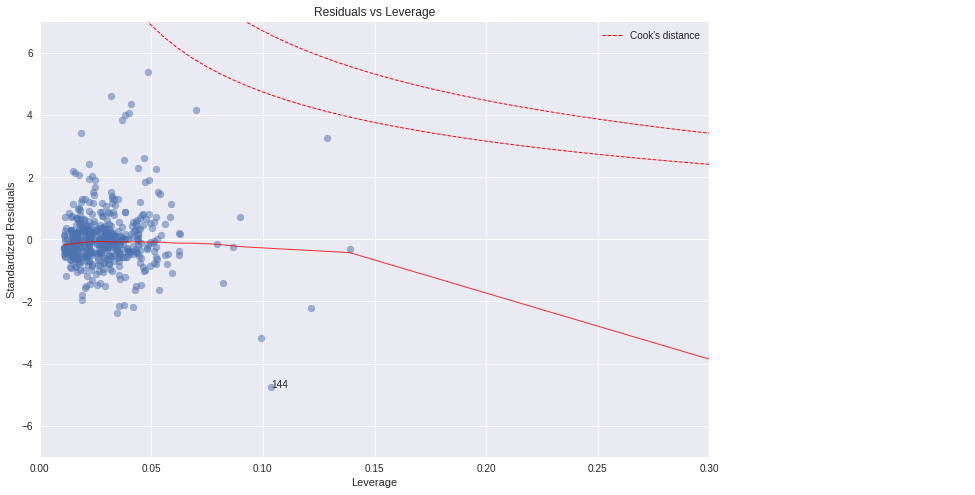

In [46]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.30)
plot_lm_4.axes[0].set_ylim(-7, 7)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(res2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.300, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.300, 50)) # 1 line

plt.legend(loc='upper right');

In [47]:
train['LoanAmountLog']= np.log(train['LoanAmount'])

train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.587249


In [48]:
mod3 = smf.ols(formula='LoanAmountLog ~ ApplicantIncome + CoapplicantIncome + Married + Education',data=train)
res3 = mod3.fit() 
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:          LoanAmountLog   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     40.66
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.60e-29
Time:                        05:48:09   Log-Likelihood:                -287.02
No. Observations:                 480   AIC:                             584.0
Df Residuals:                     475   BIC:                             604.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [49]:
# model values
model_fitted_y = res3.fittedvalues
# model residuals
model_residuals = res3.resid
# normalized residuals
model_norm_residuals = res3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals 
model_leverage = res.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = res.get_influence().cooks_distance[0]


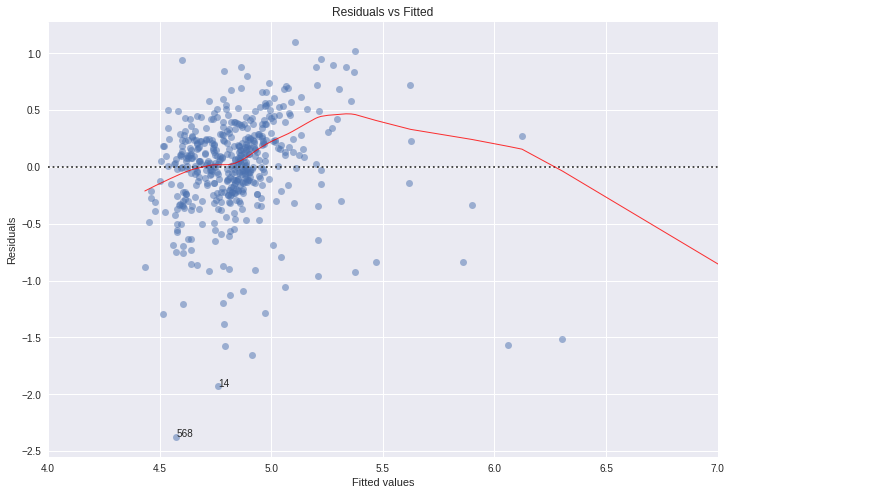

In [50]:
import math
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

#model_fitted_sqrt_y= math.sqrt(model_fitted_y)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, model_residuals, data=train,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plot_lm_1.axes[0].set_xlim(4,7)

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

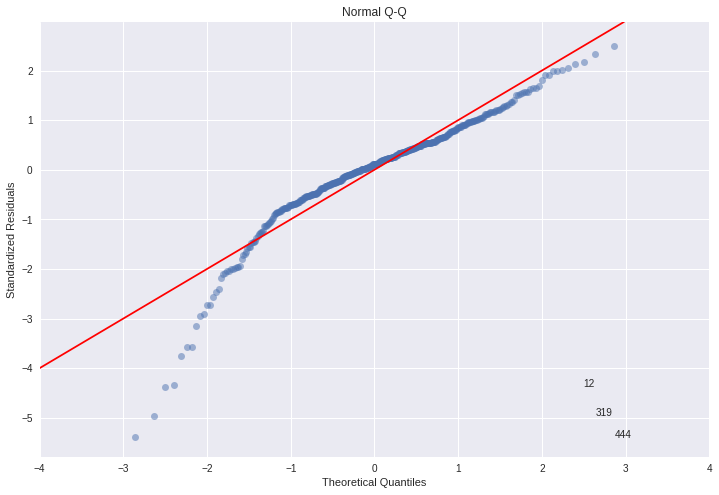

In [51]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
plot_lm_2.axes[0].set_xlim(-4,4)

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

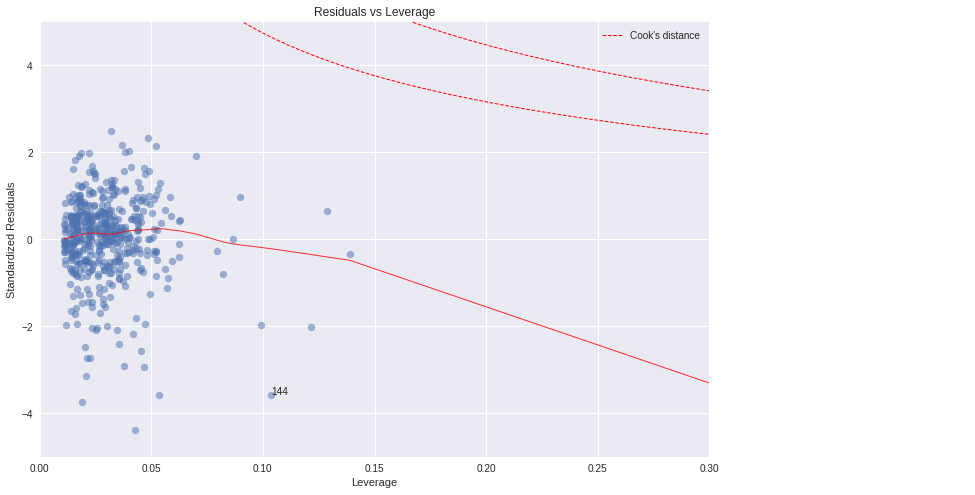

In [52]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.30)
plot_lm_4.axes[0].set_ylim(-5, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(res2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.300, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.300, 50)) # 1 line

plt.legend(loc='upper right');

# Conclusion

The only varaiables that are significant in predicting the loan amount are:

1. **Education:** People who have graduated apply for larger loans in general.
2. **Married:** People who are married apply for larger loans in general.
3. **Applicant Income:** People with higher income apply for larger loans on average.
4. **Coapplicant Income:** On average, the higher the Coapplicant's income, the larger the loan being applied for.